### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [162]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
#Loading the data into a dataframe using pandas
data123 = pd.read_csv("Twitter.data", header=None)

In [164]:
# making a copy of data to avoid loading data from file
data = data123.copy()
# displaying columns and first few rows of the dataset
print(data.columns)
data.head()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
           dtype='int64')


,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [165]:
# As the appropriate column names are missing from the dataset, assigning appropriate column names to the dataset

collist = ['NCD','AI','AS(NA)','BL','NAC','AS(NAC)','CS','AT','NA','ADL','NAD']
i = 0
for j in range(len(collist)):
    for k in range(7):
        data.rename(columns={i:collist[j]+str('_')+str(k)}, inplace = True)
        i = i+1
        if(i > len(data.columns)-1):
            break
print(len(data.columns))
data.head()

78


,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [193]:
#Analyzing basic attributes of each column of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

In [194]:
# Displaying analytics of numerical columns 
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,77
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [166]:
# Creating Feature and Target datasets from the original dataset
X = data.drop(columns =[77])
y = data.iloc[:,[77]]
y= pd.DataFrame(y)
X.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,1.0,0,2,0,0,1,1,1
1,2,1,0,0,0,0,4,2,1,0,...,0.0,0.0,1.0,2,1,0,0,0,0,4
2,1,0,0,0,0,4,1,1,0,0,...,0.0,1.0,1.0,1,0,0,0,0,4,1
3,1,0,0,1,0,0,1,1,0,0,...,0.0,0.0,1.0,1,0,0,1,0,0,1
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,1.0,0,1,0,0,1,2,3


In [167]:
#Giving an appropriate column name to the target dataset
y.rename(columns = {77:'Predicted Buzz'}, inplace = 'True')
y.head()

,Predicted Buzz
0,0.0
1,0.5
2,0.0
3,2.5
4,0.5


In [168]:
#Creating a smaller dataset which we are going to use to decide the best model for our original dataset 
from sklearn.model_selection import train_test_split

X_train_org1, XS, y_train1, ys = train_test_split(X, y, shuffle = True, test_size = 0.1, random_state = 0)

#where,  X= dataframe containing features

#y= dataframe containing the target variable

In [169]:
#Checking dimension of the smaller data set that is going to be used for model selection
print(XS.shape)
print(ys.shape)

(58325, 77)
(58325, 1)


In [170]:
#Splitting the sample data and scaling it using standard scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train_org, X_test_org, y_train, y_test = train_test_split(XS,ys, random_state = 0)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_org))
X_train.columns = X_train_org.columns.values
X_test = pd.DataFrame(scaler.transform(X_test_org))
X_test.columns = X_test_org.columns.values

In [64]:
X_train.head()
X_test.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,-0.123161,-0.118889,-0.002445,-0.158549,-0.206326,-0.155712,-0.012973,-0.030482,-0.051721,0.221010,...,-0.107809,-0.114858,-0.133501,-0.123992,-0.119668,-0.003332,-0.159190,-0.206906,-0.156349,-0.013784
1,-0.307451,-0.287806,-0.305838,-0.315156,-0.258629,-0.315028,-0.309428,-0.334469,-0.319487,-0.326728,...,-0.107809,-0.114858,-0.133501,-0.307950,-0.288315,-0.306282,-0.315587,-0.259144,-0.315482,-0.309907
2,-0.260197,-0.266394,-0.163557,-0.147494,0.024821,-0.247625,-0.273675,-0.261093,-0.273143,-0.151631,...,-0.059900,-0.100108,-0.106478,-0.258423,-0.266937,-0.164209,-0.148151,0.025637,-0.246626,-0.274193
3,-0.309814,-0.306839,-0.299561,-0.316998,-0.322743,-0.318091,-0.306449,-0.350193,-0.345234,-0.349176,...,0.178317,0.019030,3.549312,-0.310308,-0.307317,-0.300014,-0.317427,-0.323178,-0.317012,-0.306931
4,-0.165690,-0.202158,-0.119618,-0.189870,-0.116904,-0.157244,-0.158966,-0.250611,-0.231949,-0.129183,...,-0.090201,-0.099982,-0.124892,-0.166444,-0.202804,-0.120333,-0.190470,-0.117596,-0.157879,-0.159613


In [79]:
#Checking the dimension of training dataset that was obtained after splitting the sample dataset
print(X_train.shape)
print(y_train.shape)

(43743, 77)
(43743, 1)


## KNN With Bagging

In [49]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors = 9)
bag_reg = BaggingRegressor(knn_reg, n_estimators=70, max_samples=1000, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train.values.reshape((-1,)))
print(bag_reg.score(X_train,y_train))
print(bag_reg.score(X_test,y_test))

0.6582516374532881
0.7233774896767076


## Linear Regression With Bagging

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
bag_reg = BaggingRegressor(lin_reg, n_estimators=70, max_samples=1000, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train.values.reshape((-1,)))
print(bag_reg.score(X_train,y_train))
print(bag_reg.score(X_test,y_test))

0.9549130378484288
0.9562748517664634


## Ridge Regression With Pasting

In [60]:
from  sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 10)
bag_reg = BaggingRegressor(ridge_reg, n_estimators=70, max_samples=1000, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg.fit(X_train, y_train.values.reshape((-1,)))
print(bag_reg.score(X_train,y_train))
print(bag_reg.score(X_test,y_test))

0.9487935573635377
0.9514596036347338


## Lasso Regression With Pasting

In [16]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor
lasso_reg = Lasso(alpha = 1)
bag_reg = BaggingRegressor(lasso_reg, n_estimators=100, max_samples=1000, bootstrap=False, n_jobs=-1, random_state=0)
bag_reg.fit(X_train, y_train.values.reshape((-1,)))
print(bag_reg.score(X_train,y_train))
print(bag_reg.score(X_test,y_test))

0.9478598540435422
0.9529835420600499


## Linear SVR Using AdaBoost

In [176]:
#from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor
regressor = LinearSVR(C=1)
#regressor = SVR(kernel = 'linear', C = 0.01)
ada_reg = AdaBoostRegressor(regressor, n_estimators=100,learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train.values.reshape((-1,)))
print(ada_reg.score(X_train,y_train))
print(ada_reg.score(X_test,y_test))

0.7925982312851161
0.71071937351348


## Decision Tree Regression With AdaBoost

In [178]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
ada_reg = AdaBoostRegressor(dec_reg, n_estimators=100,learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train.values.reshape((-1,)))
print(ada_reg.score(X_train,y_train))
print(ada_reg.score(X_test,y_test))

0.9999971417916307
0.9477162986263951


## Gradient Boosting

In [179]:
from  sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, criterion= 'friedman_mse',learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train.values.reshape((-1,)))
print(gbrt.score(X_train,y_train))
print(gbrt.score(X_test,y_test))

0.9832930134982046
0.8886968833537736


## PCA

In [125]:
XS.shape

(58325, 77)

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(XS)

In [124]:
pca.n_components_

4

In [127]:
X_reduced.shape

(58325, 4)

In [129]:
#Splitting the sample data and scaling it using standard scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train_org, X_test_org, y_train, y_test = train_test_split(X_reduced,ys, random_state = 0)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_org))
#X_train.columns = X_train_org.columns.values
X_test = pd.DataFrame(scaler.transform(X_test_org))
#X_test.columns = X_test_org.columns.values

In [130]:
X_train.head()

,0,1,2,3
0,-0.123732,1.345827,-0.230776,-0.016114
1,-0.321760,0.030672,-0.067069,0.126869
2,-0.303906,-0.029644,-0.017302,0.063547
3,-0.316389,-0.039989,-0.053386,0.098023
4,-0.348159,0.001136,-0.076366,0.138563


In [131]:
X_test.head()

,0,1,2,3
0,-0.115436,0.218991,-0.253551,-0.356610
1,-0.325900,-0.038357,-0.028805,0.162176
2,-0.196716,-0.464615,0.450835,0.174764
3,-0.332777,0.046872,-0.117050,0.140651
4,-0.172757,-0.038187,-0.009672,0.124653


In [132]:
y_train.head()

,Predicted Buzz
504113,61.5
262726,27.0
419972,30.0
109332,13.0
146518,3.5


In [133]:
y_test.head()

,Predicted Buzz
430323,108.5
144699,17.5
231725,60.5
426427,13.5
106690,62.0


In [134]:
#Defining a function that is going to perform gridsearch on the knn and polynomial regression models. This function is 
#going to calculate the training and test r-square value for different hyperparameter(s) or combination of different 
#hyperparameters.It will then plot these different values for our analysis to choose the hyperparameter value or 
#combination of values that gives the most optimum performance with regards to both train and test data results.

def evalknnpol(regressor,degree,parameters,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train)
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    
    train_score = grid_train.cv_results_['mean_test_score']
    bestparam = grid_search.best_params_
    for i in range(degree-1):
        print("The mean of R2 value for degree "+str(i+1)+" for cv = "+ str(cv)+" : "+ str(train_score[i]))
        
    print('\n')
    bestparam = grid_search.best_params_
    print("The best parameter(s) from grid search is/are: " + str(bestparam))

    grid_test = grid_search.fit(X_test, y_test)
    
    print('\n')
    print("The results of the grid search on the test set is as below")
    print('\n')
    test_score = grid_test.cv_results_['mean_test_score']
    for i in range(degree-1):
        print("The mean of R2 value for degree "+str(i+1)+" for cv = "+ str(cv)+" : "+ str(test_score[i]))
       
    print('\n')
    print('Graph Evaluation:')
    param = list(parameters.keys())
    x_axis = range(1,degree)
    plt.plot(x_axis, train_score, c = 'g', label = 'Train Score')
    plt.plot(x_axis, test_score, c = 'b', label = 'Test Score')
    plt.legend()
    plt.xlabel(param[0])
    plt.ylabel('RSquare')
    
    return;

In [135]:
#Defining a function that is going to perform gridsearch on the ridge and lasso regression models. This function is 
#going to calculate the training and test r-square value for different hyperparameter(s) or combination of different 
#hyperparameters.It will then plot these different values for our analysis to choose the hyperparameter value or 
#combination of values that gives the most optimum performance with regards to both train and test data sets.

def evalridlas(regressor,parameters,lenpar,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train)
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    
    train_score = grid_train.cv_results_['mean_test_score']
    print(train_score)
    
    print('\n')
    for i in (parameters):
        for j in range(lenpar):
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(train_score[j]))
            
    grid_test = grid_search.fit(X_test, y_test)
    print('\n')
    print("The results of the grid search on the test set is as below")
    print('\n')
    test_score = grid_test.cv_results_['mean_test_score']
    print(test_score)
    print('\n')
    
    for i in (parameters):
        for j in range(lenpar):
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(test_score[j]))
           
    print('\n')
    print('Graph Evaluation:')
    
    plt.plot(parameters['alpha'], train_score, c = 'g', label = 'Train Score')
    plt.plot(parameters['alpha'], test_score, c = 'b', label = 'Test Score')
    plt.legend()
    plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('RSquared')
    
    return;

In [136]:
#Defining a function that is going to perform gridsearch on the linearsvm and svm with linear kernel regression models. 
#This function is going to calculate the training and test r-square value for different hyperparameter(s) or 
#combination of different hyperparameters.It will then plot these different values for our analysis to choose 
#the hyperparameter value or combination of values that gives the most optimum performance with regards to both train 
#and test data sets.

def evalsvmlin(regressor,parameters,lenpar,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    train_score = grid_train.cv_results_['mean_test_score']
    print('\n')
    for i in (parameters):
        for j in range(lenpar):
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(train_score[j]))
            
    grid_test = grid_search.fit(X_test, y_test.values.reshape((-1,)))
    print('\n')
    print("The results of the grid search on the test set is as below")
    print('\n')
    test_score = grid_test.cv_results_['mean_test_score']

    for i in (parameters):
        for j in range(lenpar):
            print("The mean of R2 value for " + str(i)+" : "+str(parameters[i][j])+" is "+ str(test_score[j]))
            
    print('\n')
    print('Graph Evaluation:')
    
    for k in parameters.keys():
        
        plt.plot(parameters[k], train_score, c = 'g', label = 'Train Score')
        plt.plot(parameters[k], test_score, c = 'b', label = 'Test Score')
        plt.legend()
        plt.xscale('log')
        plt.xlabel('C')
        plt.ylabel('RSquared')

    return;

In [137]:
#Defining a function that is going to perform gridsearch on the svm with linear and polynomial kernel regression models. 
#This function is going to calculate the training and test r-square value for different hyperparameter(s) or 
#combination of different hyperparameters.It will then plot these different values for our analysis to choose 
#the hyperparameter value or combination of values that gives the most optimum performance with regards to both train 
#and test data sets.

def evalsvmpolker(regressor,parameters,lenpar,cross,cv,scoring):
    
    from sklearn.model_selection import GridSearchCV
    import time
    
    grid_search = GridSearchCV(estimator = regressor,
                               param_grid = parameters,
                               scoring = scoring,
                               cv = cv,
                               n_jobs = -1)
    t0 = time.time()
    grid_train = grid_search.fit(X_train, y_train.values.reshape((-1,)))
    t1 = time.time()
    print("Grid Search Took %0.2f seconds" % (t1 - t0) + ", The results of the grid search on the train set is as below")
    print('\n')
    
    train_score = grid_train.cv_results_['mean_test_score']
    print(train_score)
    
    grid_test = grid_search.fit(X_test, y_test.values.reshape((-1,)))
    print('\n')
    print("The results of the grid search on the test set is as below")
    print('\n')
    test_score = grid_test.cv_results_['mean_test_score']
    print(test_score)
    print('\n')
    print("Graph Evaluation:")
    a = []
    param = list(parameters.keys())
    for i in range(cross):
        t = grid_train.cv_results_['params'][i]
        a.append(str(t[param[0]])+str('|')+str(t[param[1]]))
    len(a)
    plt.figure(figsize = (25,10))
    plt.scatter(a, train_score, c = 'g', label = 'Train Score')
    plt.scatter(a, test_score, c = 'b', label = 'Test Score')
    plt.legend()
    #plt.xscale('log')
    plt.xlabel(param[0]+ str('|')+param[1])
    plt.ylabel('RSquared')
    
    return;

In [138]:
X_train.shape

(43743, 4)

In [139]:
y_train.shape

(43743, 1)

## Linear Regression Model On PCA Transformed Data

In [140]:
#Running Linear regression model on the training dataset split from the sample dataset
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("The value of Rsquare for linear regression on training dataset is: "+ str(regressor.score(X_train, y_train)))
print("The value of Rsquare for linear regression on test dataset is: "+ str(regressor.score(X_test, y_test)))

The value of Rsquare for linear regression on training dataset is: 0.931916010798806
The value of Rsquare for linear regression on test dataset is: 0.9350747612499071


## Evaluation Remarks on Linear Regression On PCA Transformed Data
Linear Regression model on the PCA transformed data gave us the value of Rsquare as **.9319** for the training set and **.9350** for the test dataset.

## Knn Regression Model On PCA Transformed Data

Grid Search Took 18.97 seconds, The results of the grid search on the train set is as below


The mean of R2 value for degree 1 for cv = 5 : 0.8434820380824597
The mean of R2 value for degree 2 for cv = 5 : 0.8764856769567548
The mean of R2 value for degree 3 for cv = 5 : 0.8763884737083728
The mean of R2 value for degree 4 for cv = 5 : 0.8736966557772647
The mean of R2 value for degree 5 for cv = 5 : 0.8702828089293998
The mean of R2 value for degree 6 for cv = 5 : 0.8650994541363886
The mean of R2 value for degree 7 for cv = 5 : 0.8586449039210001
The mean of R2 value for degree 8 for cv = 5 : 0.8527008319165754
The mean of R2 value for degree 9 for cv = 5 : 0.8465438250376107


The best parameter(s) from grid search is/are: {'n_neighbors': 2}


The results of the grid search on the test set is as below


The mean of R2 value for degree 1 for cv = 5 : 0.844565712034258
The mean of R2 value for degree 2 for cv = 5 : 0.8814037138610031
The mean of R2 value for degree 3 for cv = 5 : 0.8

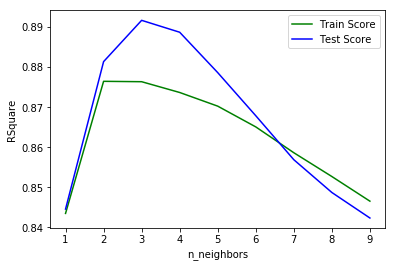

In [141]:
#Running the knn regression model on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results on train and
#test datasets and an graph analyzing which we can the choose the optimum hyperparameter values for best model performance.

regressor = KNeighborsRegressor()
k_range = range(1,10)
parameters = dict(n_neighbors = k_range)
evalknnpol(regressor,10,parameters, 5, "r2")

### Evaluation Comment for Knn Regression Model on PCA Transformed Data

The mean value of Rsquare for **degree = 3** is observed to be **0.8764** in the train dataset and **0.8917** for test dataset with 5 fold cross valdition. All the R-square values for the train and test datasets appear to be very close to each other, but we found the value for n_neighbors = 3 as the best parameter as it has the best balance between train and test score.

## Ridge Regression Model On PCA Transformed Data

Grid Search Took 10.72 seconds, The results of the grid search on the train set is as below


[0.92441488 0.92441482 0.9244142  0.92440793 0.92433806]


The mean of R2 value for alpha : 0.01 is 0.9244148849406072
The mean of R2 value for alpha : 0.1 is 0.9244148230503139
The mean of R2 value for alpha : 1 is 0.9244142034233317
The mean of R2 value for alpha : 10 is 0.9244079347959135
The mean of R2 value for alpha : 100 is 0.9243380597062221


The results of the grid search on the test set is as below


[0.93680586 0.93680599 0.93680728 0.93681937 0.93686065]


The mean of R2 value for alpha : 0.01 is 0.9368058563823689
The mean of R2 value for alpha : 0.1 is 0.9368059862585467
The mean of R2 value for alpha : 1 is 0.9368072768792517
The mean of R2 value for alpha : 10 is 0.936819370594388
The mean of R2 value for alpha : 100 is 0.9368606492931425


Graph Evaluation:


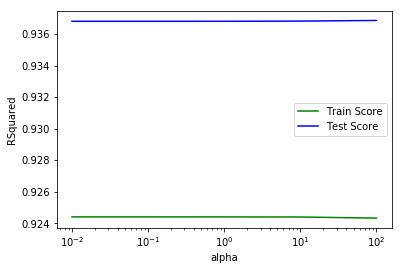

In [142]:
#Running the Ridge regression model on the training dataset split from the sample dataset by calling the evalridlas
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from  sklearn.linear_model import Ridge
regressor = Ridge()
parameters = dict(alpha = (0.01, 0.1, 1, 10, 100))
evalridlas(regressor,parameters, 5,5, "r2")

## Evaluation Remarks for Ridge Regression model on PCA Transformed Data :
Although the train scores appear to be good for the ridge regression model, there is quite a gap between the train scores and test scores. The best balance between the train and the test score is found to be for **alpha = .01** and we will choose this as the best parameter for this model. The corresponding R-square value for train and test data set is **.9244** and **.9368** respectively.

## Lasso Regression Model On PCA Transformed Data

Grid Search Took 10.74 seconds, The results of the grid search on the train set is as below


[0.92441399 0.92440552 0.92431196 0.92223207 0.87109075]


The mean of R2 value for alpha : 0.01 is 0.9244139895444087
The mean of R2 value for alpha : 0.1 is 0.9244055238810533
The mean of R2 value for alpha : 1 is 0.9243119622863354
The mean of R2 value for alpha : 10 is 0.9222320681643653
The mean of R2 value for alpha : 100 is 0.8710907515679883


The results of the grid search on the test set is as below


[0.93680657 0.93681285 0.93686137 0.93596164 0.88146411]


The mean of R2 value for alpha : 0.01 is 0.9368065664222738
The mean of R2 value for alpha : 0.1 is 0.9368128510584346
The mean of R2 value for alpha : 1 is 0.9368613680929457
The mean of R2 value for alpha : 10 is 0.9359616392795498
The mean of R2 value for alpha : 100 is 0.8814641097343439


Graph Evaluation:


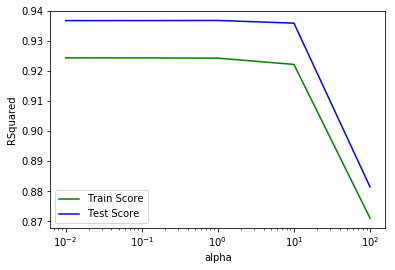

In [143]:
#Running the Lasso regression model on the training dataset split from the sample dataset by calling the evalridlas
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.linear_model import Lasso
regressor = Lasso()
parameters = dict(alpha = (0.01, 0.1, 1, 10, 100))
evalridlas(regressor,parameters, 5,5, "r2")

## Evaluation Remarks for Lasso Regression model On PCA Transformed Data:
Although the train scores appear to be good for the ridge regression model, there is quite a gap between the train scores and test scores. The best balance between the train and the test score is found to be for **alpha = .01** and we will choose this as the best parameter for this model. The corresponding R-square value for train and test data set is **.9244** and **.9368** respectively.

## Linear SVR Regression Model On PCA Transformed Data

Grid Search Took 21.17 seconds, The results of the grid search on the train set is as below


The mean of R2 value for C : 0.01 is 0.21501215803468662
The mean of R2 value for C : 0.1 is 0.8288766085128636
The mean of R2 value for C : 1 is 0.9090500059747408
The mean of R2 value for C : 10 is 0.9139198653660322
The mean of R2 value for C : 100 is 0.9144871220411068


The results of the grid search on the test set is as below


The mean of R2 value for C : 0.01 is 0.009420064314245493
The mean of R2 value for C : 0.1 is 0.628402812296745
The mean of R2 value for C : 1 is 0.9134180820616156
The mean of R2 value for C : 10 is 0.9278553533719345
The mean of R2 value for C : 100 is 0.9291656772549087


Graph Evaluation:


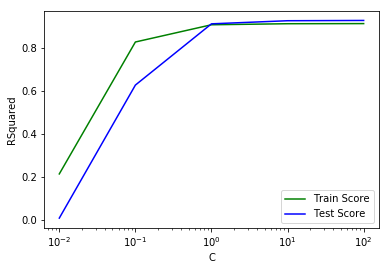

In [144]:
#Running the Linear support vector regression model on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import LinearSVR
#SVR(C = 0.01, epsilon =0.1)
regressor = LinearSVR(C = 0.01)
parameters = dict(C = (0.01, 0.1, 1, 10, 100))
for i in parameters.keys():
    b = len(parameters[i])
evalsvmlin(regressor,parameters,b,5,"r2")

## Evaluation Remarks for Linear SVR Model On PCA Transformed Data:
The values of R-square for both train and test data appear to be pretty low for this model. From the graph,the best parameter is **C= 10** where the train and test scores are relatively higher and also close to each other. The train and test scores at C=100 are **0.9139** and **0.9278** respectively.

## Polynomial Regression Model On PCA Transformed Data

Grid Search Took 11.05 seconds, The results of the grid search on the train set is as below


The mean of R2 value for degree 1 for cv = 5 : 0.9244148918164939
The mean of R2 value for degree 2 for cv = 5 : 0.9317159032719098
The mean of R2 value for degree 3 for cv = 5 : 0.4802333450493901


The best parameter(s) from grid search is/are: {'polynomial__degree': 2}


The results of the grid search on the test set is as below


The mean of R2 value for degree 1 for cv = 5 : 0.9368058419425438
The mean of R2 value for degree 2 for cv = 5 : 0.8971279936261967
The mean of R2 value for degree 3 for cv = 5 : -0.9437280205684028


Graph Evaluation:


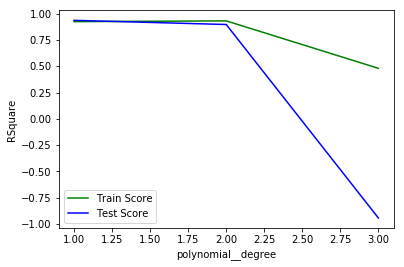

In [145]:
#Running the Polynomial regression model on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.pipeline import Pipeline
from  sklearn.preprocessing  import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
regressor = Pipeline([('polynomial', PolynomialFeatures(degree = 3)), ('linear', LinearRegression())])
k_range = range(1,4)
parameters = dict(polynomial__degree = k_range)
evalknnpol(regressor,4,parameters, 5, "r2")

## Evaluation Remarks for Polynomial Regression model
We ran the polynoial regression model for **degrre = 2**, but it is visible from the above graph that result for degree 1 is slightly better than the results for degree =2. The model with degree =1 gave R-square value of **0.9244** for the training data set and **.9368** for the test data set.

## Support Vector Regression With Linear Kernel On PCA Transformed Data

Grid Search Took 711.52 seconds, The results of the grid search on the train set is as below


The mean of R2 value for C : 0.01 is 0.26005777601484703
The mean of R2 value for C : 0.1 is 0.8360030894535007
The mean of R2 value for C : 1 is 0.9094961393178417
The mean of R2 value for C : 10 is 0.9139774112945857
The mean of R2 value for C : 100 is 0.9144306055033453


The results of the grid search on the test set is as below


The mean of R2 value for C : 0.01 is 0.04707763029611883
The mean of R2 value for C : 0.1 is 0.6621770221278989
The mean of R2 value for C : 1 is 0.9146162062076201
The mean of R2 value for C : 10 is 0.9279684759363162
The mean of R2 value for C : 100 is 0.9292128973489392


Graph Evaluation:


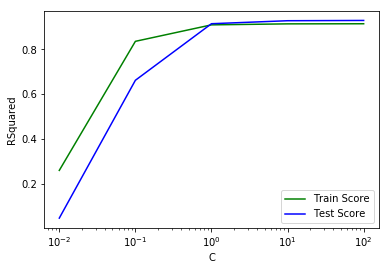

In [146]:
#Running the Support vector regression model with linear kernel on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C = 0.01)
parameters = dict(C = (0.01, 0.1, 1, 10, 100))
for i in parameters.keys():
    b = len(parameters[i])
evalsvmlin(regressor,parameters,b,5,"r2")

## Evaluation Remarks for SV Regression model with Linear Kernel :
Both train and test scores appear to be good for this model, but by looking at the graph we could conclude that the optimum value of **C** would be **1** and the respective values of R-square for train and test data set would be **0.9094** and **0.9146** respectively.

## Support Vector Regression With rbf Kernel On PCA Transformed Data

Grid Search Took 3772.76 seconds, The results of the grid search on the train set is as below


[-0.07016868 -0.05210681 -0.02118397 -0.01448478 -0.03737747 -0.03014012
  0.10352566  0.13807617  0.07430855  0.0089818   0.25289176  0.34054659
  0.26176682  0.15393787  0.05855409  0.55674343  0.46894901  0.35996424
  0.2340531   0.1152615   0.69780578  0.58476056  0.44560276  0.31178555
  0.17946812]


The results of the grid search on the test set is as below


[-0.08623973 -0.07882047 -0.06472568 -0.05681396 -0.06790223 -0.06995215
 -0.00210754  0.06903875  0.04002853 -0.01443871  0.07797892  0.29686175
  0.24578643  0.1346976   0.04093189  0.52042557  0.47028718  0.36970044
  0.22943687  0.10412207  0.69068636  0.58968369  0.46264306  0.32347542
  0.17598421]


Graph Evaluation:


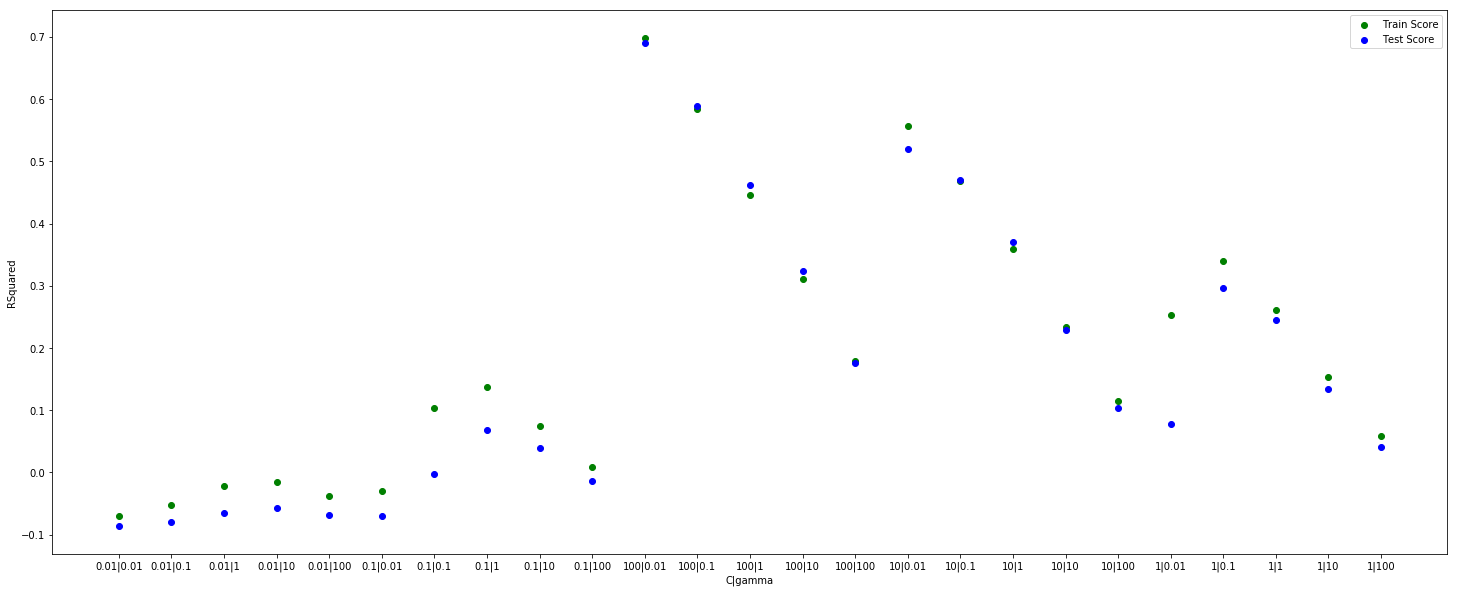

In [147]:
#Running the support vector regression model with rbf kernel on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import SVR
import functools
import operator
regressor = SVR(kernel = 'rbf', C = 0.01, gamma = .01)
parameters = dict(C = (0.01, 0.1, 1, 10, 100), gamma = (0.01, 0.1, 1, 10, 100))
b =[]
for i, j in enumerate(parameters.keys()):
    b.append(len(parameters[j]))
c = functools.reduce(operator.mul,b,1)
evalsvmpolker(regressor,parameters,b,c,5,"r2")

## Evaluation Remarks for Support Vector Regression Model with rbf kernel:
We could see that the performance of this model appear to be doing worse than the other models for this data set. The best parameter combination is observerd to be **C = 100 and gamma = 0.01**. The corresponding R-square value for this combnination is **0.6978** and **0.6906** for train and test dataset respectively.

## Support Vector Regression With Poly Kernel On PCA Transformed Data

Grid Search Took 2152.37 seconds, The results of the grid search on the train set is as below


[ 0.01982878  0.37726895  0.55016382 -0.55274864  0.89052444 -0.93731171
  0.91212296 -0.83074375  0.91423682 -0.83030704]


The results of the grid search on the test set is as below


[-0.05293355  0.30623189  0.22237212 -0.02680023  0.84496203 -1.04291079
  0.92317251 -1.39050274  0.92883443 -1.39246259]


Graph Evaluation:


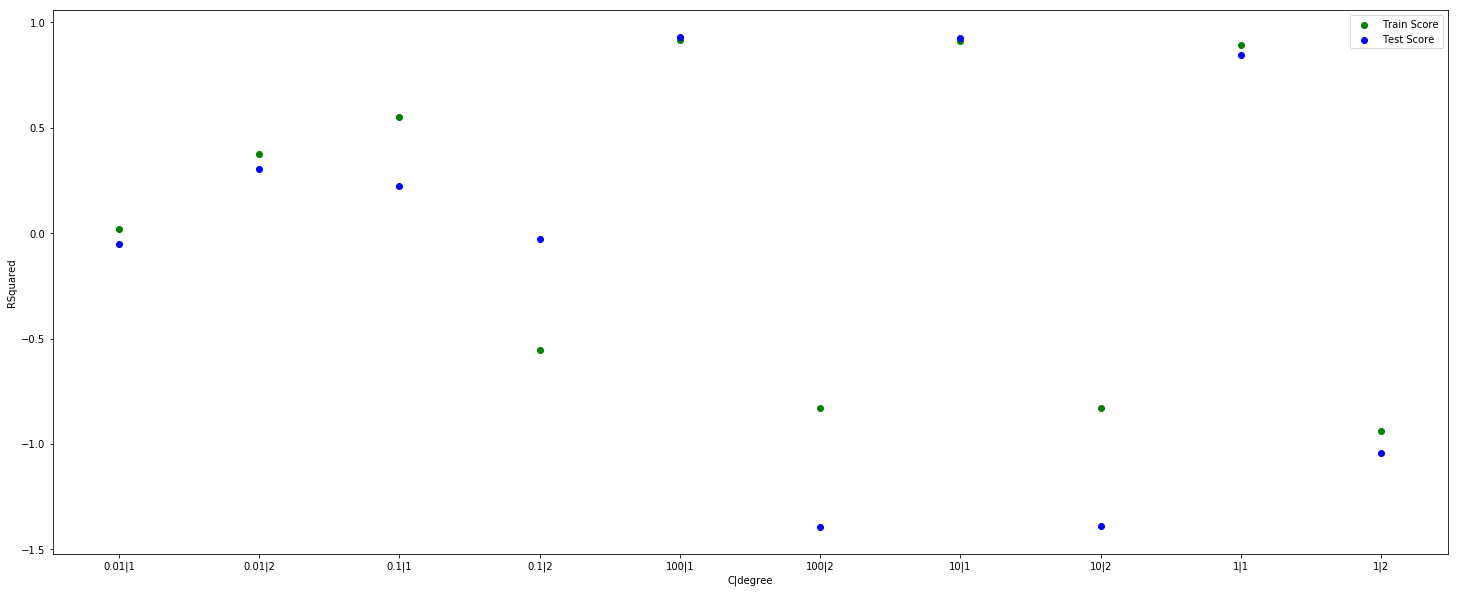

In [148]:
#Running the support vector regression model with polynomial kernel on the training dataset split from the sample dataset by calling the evalknnpol
#function.As discussed earlier this function will give us the tools in terms of gridsearch results for train and
#test datasets and an graph that we can analyze to choose the optimum hyperparameter values for best model performance.

from sklearn.svm import SVR
import functools
import operator
regressor = SVR(kernel = 'poly', C = 0.01, degree = 2)
parameters = dict(C = (0.01, 0.1, 1, 10, 100), degree = (1,2))
b =[]
for i, j in enumerate(parameters.keys()):
    #a = len(parameters[j])
    b.append(len(parameters[j]))  
c = functools.reduce(operator.mul,b,1)
evalsvmpolker(regressor,parameters,b,c,5,"r2")

## Evaluation Remarks for Support Vector Regression Model with poly kernel:

We could see that the performance of this model for degree = 1 is overall a lot better than degree = 2. The best parameter combination can be observed at C =100 and degree =1. The corresponding values of R-square for this combination is 0.9142 and 0.9288 for train and test dataset respectively.


## Result Summary of models run on the non transformed data set in the previous project

In [185]:
report_data = [['Linear Regression','N/A','0.9609','0.7743'],['KNN','Degree:9','0.8662','0.7725'],['Polynomial','Degree:1', '0.9535','0.7614'],['Ridge','Alpha:10','0.9547','0.7729'],
               ['Lasso','Alpha:1','0.955','0.778'],['SVR- Linear Kernel','C:10','0.9545','0.8898'],['Linear SVR','C:100','0.3532','0.3658'],['SVR-Poly Kernel','Degree:1, C:100', '0.8576','0.7987'],['SVR-rbf Kernel','C:100, Gamma:0.01','0.3747','0.3854']]
report_table = pd.DataFrame(report_data, columns=['Algorithm','Best Parameter','R-Square-Train','R-Square-Test'])
report_table

,Algorithm,Best Parameter,R-Square-Train,R-Square-Test
0,Linear Regression,N/A,0.9609,0.7743
1,KNN,Degree:9,0.8662,0.7725
2,Polynomial,Degree:1,0.9535,0.7614
3,Ridge,Alpha:10,0.9547,0.7729
4,Lasso,Alpha:1,0.955,0.778
5,SVR- Linear Kernel,C:10,0.9545,0.8898
6,Linear SVR,C:100,0.3532,0.3658
7,SVR-Poly Kernel,"Degree:1, C:100",0.8576,0.7987
8,SVR-rbf Kernel,"C:100, Gamma:0.01",0.3747,0.3854


## Result Summary comparison on transformed and non-transformed data set

In [187]:
report_data = [['Linear Regression','N/A','0.9609','0.7743','N/A','0.9319','0.9350'],['KNN','Degree:9','0.8662','0.7725', 'Degree:3','0.8764','0.8917'],['Polynomial','Degree:1', '0.9535','0.7614', 'Degree:1', '0.9244','0.9368'],['Ridge','Alpha:10','0.9547','0.7729', 'Alpha:.01','0.9244','0.9368'],['Lasso','Alpha:1','0.955','0.778', 'Alpha:0.01','0.9244','0.9368'],['SVR- Linear Kernel','C:10','0.9545','0.8898', 'C:1','0.9094','0.9146'],['Linear SVR','C:100','0.3532','0.3658', 'C:10','0.9139','0.9278'],['SVR-Poly Kernel','Degree:1, C:100', '0.8576','0.7987', 'Degree:1, C:100', '0.9142','0.9288'],['SVR-rbf Kernel','C:100, Gamma:0.01','0.3747','0.3854', 'C:100, Gamma:0.01','0.6978','0.6906']]

report_table = pd.DataFrame(report_data, columns=['Algorithm','Best Parameter','R-Square-Train','R-Square-Test','Best Parameter-PCA','R-Square-Train-PCA','R-Square-Test-PCA'])

report_table

,Algorithm,Best Parameter,R-Square-Train,R-Square-Test,Best Parameter-PCA,R-Square-Train-PCA,R-Square-Test-PCA
0,Linear Regression,N/A,0.9609,0.7743,N/A,0.9319,0.9350
1,KNN,Degree:9,0.8662,0.7725,Degree:3,0.8764,0.8917
2,Polynomial,Degree:1,0.9535,0.7614,Degree:1,0.9244,0.9368
3,Ridge,Alpha:10,0.9547,0.7729,Alpha:.01,0.9244,0.9368
4,Lasso,Alpha:1,0.955,0.778,Alpha:0.01,0.9244,0.9368
5,SVR- Linear Kernel,C:10,0.9545,0.8898,C:1,0.9094,0.9146
6,Linear SVR,C:100,0.3532,0.3658,C:10,0.9139,0.9278
7,SVR-Poly Kernel,"Degree:1, C:100",0.8576,0.7987,"Degree:1, C:100",0.9142,0.9288
8,SVR-rbf Kernel,"C:100, Gamma:0.01",0.3747,0.3854,"C:100, Gamma:0.01",0.6978,0.6906


## Table Summary Analysis

The Linear Regression, KNN regression, Linear SVR, SVR-poly kernel and SVR-rbf kernel models gives better results on the PCA transformed data set where as Polynomial, ridge, lasso and SVR-linear kernel regression models give slightly better results on the original non-transformed data set.

## Deep Learning Regression Model

In [150]:
X.shape

(583250, 77)

In [151]:
y.shape

(583250, 1)

In [152]:
#Creating a smaller dataset which we are going to use to decide the best model for our original dataset 
from sklearn.model_selection import train_test_split

X_train_org1, XS, y_train1, ys = train_test_split(X, y, shuffle = True, test_size = 0.1, random_state = 0)

#where,  X= dataframe containing features

#y= dataframe containing the target variable

In [153]:
#Splitting the sample data and scaling it using standard scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


X_train_org, X_test_org, y_train, y_test = train_test_split(XS,ys, random_state = 0)

#X_train, X_test, y_train, y_test = train_test_split(XS,ys, random_state = 0)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_org))
X_train.columns = X_train_org.columns.values
X_test = pd.DataFrame(scaler.transform(X_test_org))
X_test.columns = X_test_org.columns.values

In [154]:
X_train.head()
X_test.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,-0.123161,-0.118889,-0.002445,-0.158549,-0.206326,-0.155712,-0.012973,-0.030482,-0.051721,0.221010,...,-0.107809,-0.114858,-0.133501,-0.123992,-0.119668,-0.003332,-0.159190,-0.206906,-0.156349,-0.013784
1,-0.307451,-0.287806,-0.305838,-0.315156,-0.258629,-0.315028,-0.309428,-0.334469,-0.319487,-0.326728,...,-0.107809,-0.114858,-0.133501,-0.307950,-0.288315,-0.306282,-0.315587,-0.259144,-0.315482,-0.309907
2,-0.260197,-0.266394,-0.163557,-0.147494,0.024821,-0.247625,-0.273675,-0.261093,-0.273143,-0.151631,...,-0.059900,-0.100108,-0.106478,-0.258423,-0.266937,-0.164209,-0.148151,0.025637,-0.246626,-0.274193
3,-0.309814,-0.306839,-0.299561,-0.316998,-0.322743,-0.318091,-0.306449,-0.350193,-0.345234,-0.349176,...,0.178317,0.019030,3.549312,-0.310308,-0.307317,-0.300014,-0.317427,-0.323178,-0.317012,-0.306931
4,-0.165690,-0.202158,-0.119618,-0.189870,-0.116904,-0.157244,-0.158966,-0.250611,-0.231949,-0.129183,...,-0.090201,-0.099982,-0.124892,-0.166444,-0.202804,-0.120333,-0.190470,-0.117596,-0.157879,-0.159613


In [188]:
#Checking the dimension of training dataset that was obtained after splitting the sample dataset
print(X_train.shape)
print(y_train.shape)

(43743, 77)
(43743, 1)


In [157]:
# create model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(77, input_dim=77, kernel_initializer='normal', activation='relu'))#input layer
model.add(Dense(10, activation='relu')) #hidden layer
model.add(Dense(1, kernel_initializer='normal'))#output layer - no activation function

C:\Users\barun\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [189]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [190]:
model.fit(X_train, y_train, epochs = 50, batch_size = 20)

Epoch 1/50
43743/43743 [==============================] - 2s 37us/step - loss: 389940.2547 - mean_squared_error: 389940.2547 0s - loss: 344376.5127 -
Epoch 2/50
43743/43743 [==============================] - 1s 33us/step - loss: 389936.3734 - mean_squared_error: 389936.3734
Epoch 3/50
43743/43743 [==============================] - 1s 33us/step - loss: 389958.5956 - mean_squared_error: 389958.5956
Epoch 4/50
43743/43743 [==============================] - 2s 35us/step - loss: 389961.8279 - mean_squared_error: 389961.8279
Epoch 5/50
43743/43743 [==============================] - 1s 32us/step - loss: 389962.3057 - mean_squared_error: 389962.3057
Epoch 6/50
43743/43743 [==============================] - 1s 31us/step - loss: 389891.5359 - mean_squared_error: 389891.5359
Epoch 7/50
43743/43743 [==============================] - 1s 32us/step - loss: 389923.1313 - mean_squared_error: 389923.1313
Epoch 8/50
43743/43743 [==============================] - 1s 32us/step - loss: 389960.8649 - mean_sq

In [191]:
model.evaluate(X_test, y_test)

14582/14582 [==============================] - 0s 16us/step


[329049.1459054828, 329049.1459054828]

In [192]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.6f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.6f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.000131
Test score: -0.000264
